In [ ]:
#todo
# create a dictionary to count the number of each DNA letter in each sequence
# graph the frequency of DNA letters for each sequence
# create a function that is able to take in new data files in similar format
# with different number of sequences and produce the same results 
#read the text file
text_path ="dna_raw.txt"

with open(text_path, "r") as file:
    raw_text = file.read().strip()

#initialize the list and current sequence variable
dna_sequence = []
current_sequence = ""

#proccessing each line
for line in raw_text:
    line = line.strip().upper()

    if line.startswith(">"):

        #stores the previous sequence
        if current_sequence:
            dna_sequence.append(current_sequence)
            
            #resetts for the next sequence
            current_sequence = ""
    else:
        current_sequence += line

# stores the last sequence
if current_sequence:
    dna_sequence.append(current_sequence)

#dictionary tp store the letters
letters_dictionary = []

#for loop to count the letters
for sequence in dna_sequence:
    count_dictionary = {"A": 0, "C":0, "G":0, "T":0}
    sequence = sequence.upper()

    for letters in sequence:
        if letters in count_dictionary:
            count_dictionary[letters] += 1
    
    letters_dictionary.append(count_dictionary)


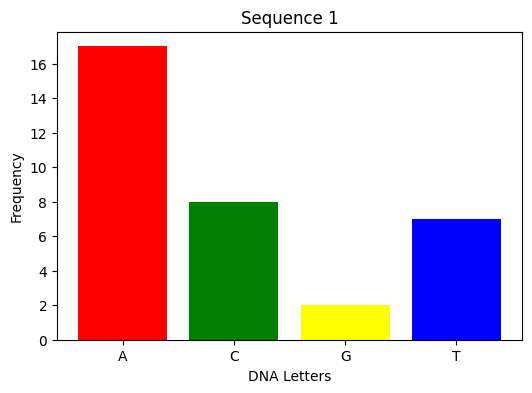

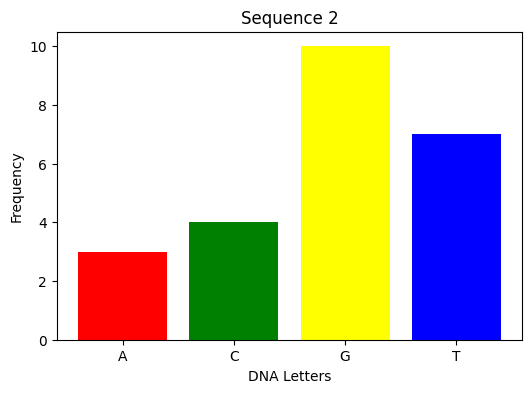

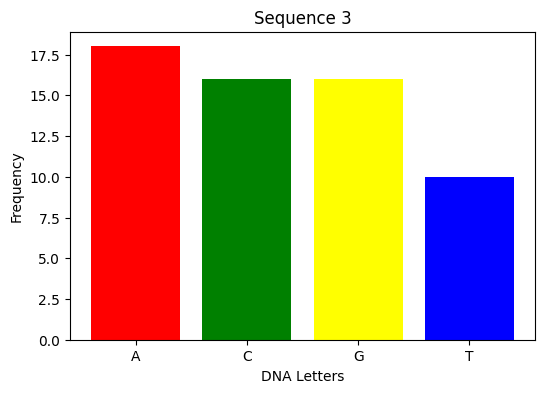

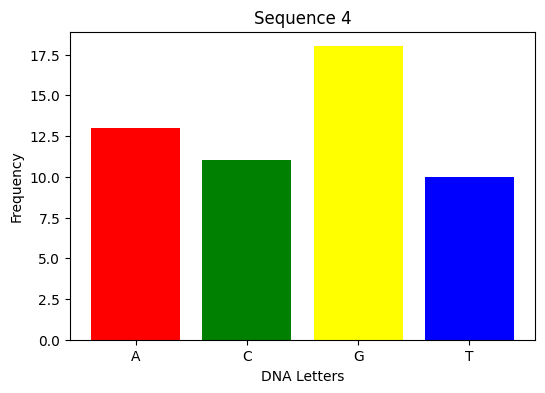

In [68]:
import matplotlib.pyplot as plt
# create the diagram #

#loops through every sequence
for i, letter_count in enumerate(letters_dictionary, start = 1):
    plt.figure(figsize=(6, 4))

    # the x-coordinates
    dna_letters = list(letter_count.keys())

    # the y-coordinates
    counts = list(letter_count.values())
    
    #print the diagram
    plt.bar(dna_letters, counts, color=['red', 'green', 'yellow', 'blue'])

    plt.title(f"Sequence {i}")
    plt.xlabel("DNA Letters")
    plt.ylabel("Frequency")

    plt.show()